# Q1

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def round(x):
    """Round a number down to the nearest integer if it's negative."""
    if x >= 0:
        return int(x)
    else:
        return int(x) - 1


def pdf_1p(x, dx):
    """Compute the 1-point probability density function (PDF) for a dataset x with bin width dx."""
    # Calculate the number of bins needed
    n = int((x.max() - x.min()) / dx) + 1

    # Initialize an array to store the PDF values
    pdf = np.zeros(n)

    # Shift x values to start from zero for binning
    x -= x.min()

    # Count occurrences in each bin
    for i in range(len(x)):
        j = round(x[i] / dx)
        pdf[j] += 1  

    # Normalize PDF by total count and bin width to ensure it sums to 1
    pdf /= (np.sum(pdf) * dx)  
    
    return pdf


def pdf_2p(x, y, dx, dy, nx, ny, tau):
    """Compute the 2-point joint PDF for datasets x and y with bin widths dx and dy."""
    # Calculate the number of bins needed for x and y
    numx = int((x.max() - x.min()) / dx) + 1
    numy = int((y.max() - y.min()) / dy) + 1

    # Initialize a 2D array to store the joint PDF values
    pdf = np.zeros((numx, numy))

    # Shift x and y values to start from zero for binning
    x -= x.min()
    y -= y.min()

    # Loop over x and y values with time shifts to populate the joint PDF
    for i in range(len(x) - np.max((nx, ny)) * tau):
        j1 = round(x[i + (nx * tau)] / dx)
        j2 = round(y[i + (ny * tau)] / dy)
        pdf[j1, j2] += 1

    # Normalize joint PDF by total count and bin areas to ensure it sums to 1
    return pdf / (np.sum(pdf) * dx * dy)


def delta(data, dx, taus):
    """Compute delta as a function of tau for the input data with bin width dx."""
    delta_tau = []

    # Loop over the range of tau values
    for tau in range(taus):
        sum_val = 0  # Initialize sum for conditional term calculation

        # Define time-shifted data segments
        x_1 = data[:len(data) - 2 * tau]
        x_2 = data[tau:len(data) - tau]
        x_3 = data[2 * tau:]


        p_2 = pdf_1p(x_2, dx)          # 1-point PDF of x_2
        p_31 = pdf_2p(x_3, x_1, dx, dx, 2, 0, tau)  # Joint PDF of (x_3, x_1)
        p_32 = pdf_2p(x_3, x_2, dx, dx, 2, 1, tau)  # Joint PDF of (x_3, x_2)
        p_21 = pdf_2p(x_2, x_1, dx, dx, 1, 0, tau)  # Joint PDF of (x_2, x_1)


        l = len(p_2)

        # Calculate the integral of the conditional term using the joint and 1-point PDFs
        for i in range(l):
            for j in range(l):
                if p_2[i] != 0:  # Avoid division by zero
                    sum_val += ((p_32[i, j] * p_21[i, j]) / p_2[i]) * dx

        delta = np.abs(np.sum(p_31 * (dx ** 2)) - sum_val)
        delta_tau.append(delta)

    return delta_tau


 Maximum value for Δ(τ) = 98.99999999999999
 Minimum value for Δ(τ) = 1.828343148511292


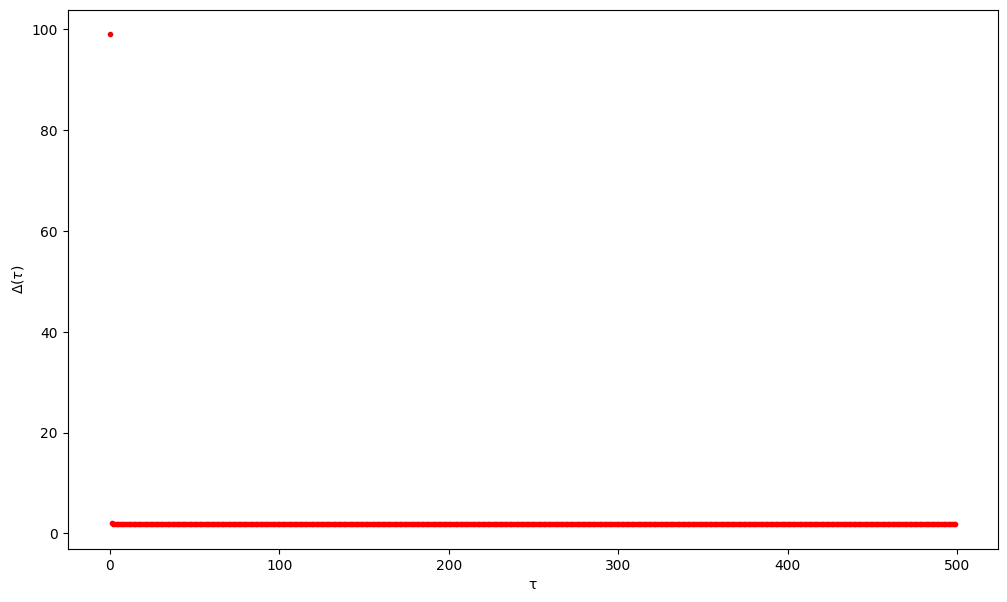

In [27]:
# Load data from the provided text file
file_path = 'data.txt'
data = np.loadtxt(file_path)

delta_tau = delta(data, dx = 0.1, taus = 500)

print(u' Maximum value for \u0394(τ) =', max(delta_tau))
print(u' Minimum value for \u0394(τ) =', min(delta_tau))

plt.figure(figsize=(12,7))
plt.plot(delta_tau, ls="", marker=".", color="red")
plt.xlabel('τ')
plt.ylabel(r'$\Delta(τ)$')
plt.show()

# Q2

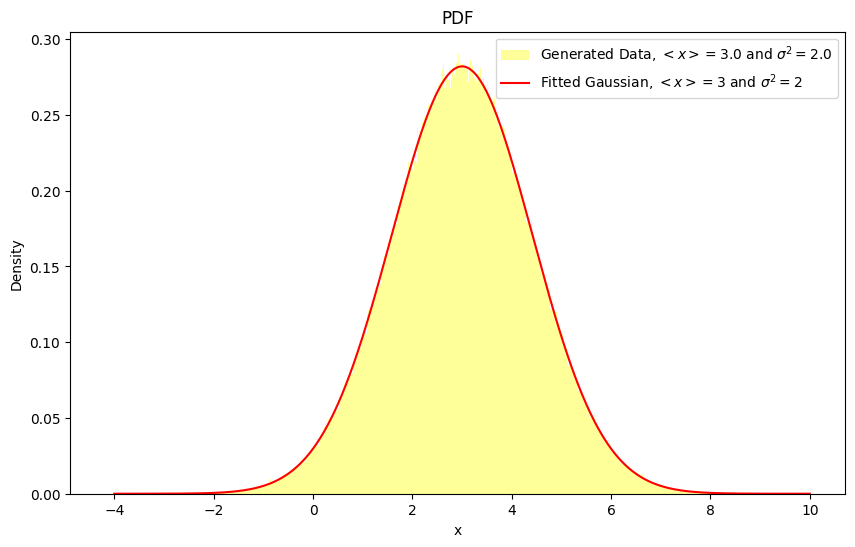

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mean_x = 3        # Desired mean <x>
sigma = np.sqrt(2)  # Desired standard deviation sqrt(sigma^2)

def generate_gaussian_box_muller(n, mean, std_dev):
    """
    Generates `n` Gaussian random variables with given mean and standard deviation
    using the Box-Muller transform.
    """
    # Generate pairs of uniform random numbers
    u1 = np.random.uniform(0, 1, n // 2)
    u2 = np.random.uniform(0, 1, n // 2)
    
    # Box-Muller transformation
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    
    # Combine and adjust for the desired mean and standard deviation
    z = np.concatenate((z0, z1))  # Combine z0 and z1 to get n samples
    x = std_dev * z + mean        # Scale and shift to desired mean and std deviation
    return x

def gaussian(x, mean, std_dev):
    normalization_factor = np.sqrt(2 * np.pi * std_dev ** 2)
    return np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2)) / normalization_factor

# Generate data
num_samples = 1000000
generated_data = generate_gaussian_box_muller(num_samples, mean_x, sigma)

axis = np.linspace(-4, 10, 10000)
gaussian_func = gaussian(axis, mean_x, sigma)

# Check mean and variance of generated data
generated_mean = np.mean(generated_data)
generated_variance = np.var(generated_data)

# Plot histogram of generated data and the fitted gaussian
plt.figure(figsize=(10, 6))
plt.hist(generated_data, bins=1000, density=True, alpha=0.4, color='yellow', label=rf'Generated Data, $<x> = ${round(generated_mean, 2)} and $ \sigma^2 = {round(generated_variance, 2)}$')
plt.plot(axis, gaussian_func, label=rf'Fitted Gaussian, $<x> = ${mean_x} and $ \sigma^2 = {round(sigma ** 2)}$', color='red')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('PDF')
plt.show()


# Q3

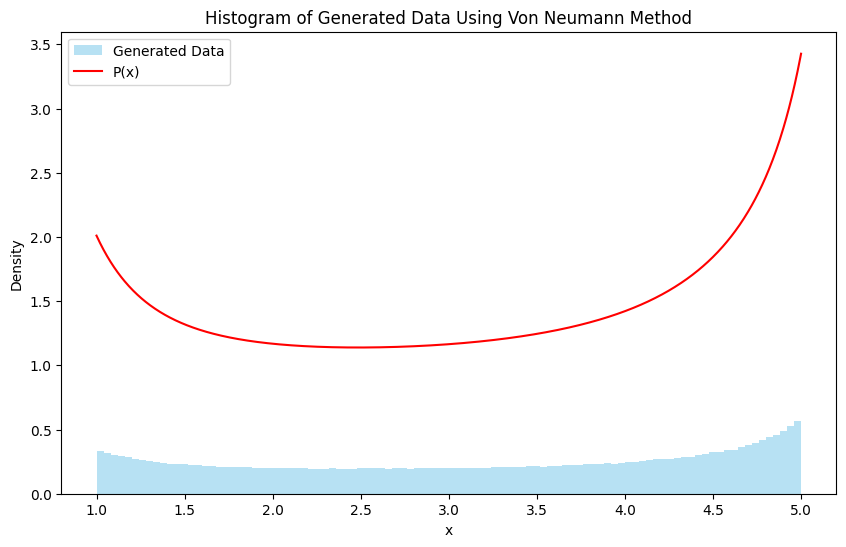

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PDF function
def p(x):
    return np.sin(x**2 / 100) + 1 / np.cos(x**3 / 100) + x**-3

# Set the range and an upper bound M for p(x) in the range [1, 5]
x_min, x_max = 1, 5
M = 4  # Setting an approximate upper bound based on the function's max in this range

# Number of samples we want to generate
num_samples = 1000000
samples = []

# Von Neumann rejection sampling
while len(samples) < num_samples:
    # Generate a candidate x uniformly in the range [x_min, x_max]
    x_candidate = np.random.uniform(x_min, x_max)
    
    # Generate a uniform random number for acceptance
    u = np.random.uniform(0, 1)
    
    # Accept or reject the candidate
    if u * M <= p(x_candidate):
        samples.append(x_candidate)

# Convert samples to a numpy array for easier plotting and manipulation
samples = np.array(samples)

axis = np.linspace(1, 5, 1000)
pdf = p(axis)

# Plot the histogram of the generated samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=100, density=True, alpha=0.6, color='skyblue', label="Generated Data")
plt.plot(axis, pdf, color='red', label ="P(x)")
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Generated Data Using Von Neumann Method')
plt.legend()
plt.show()
